# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

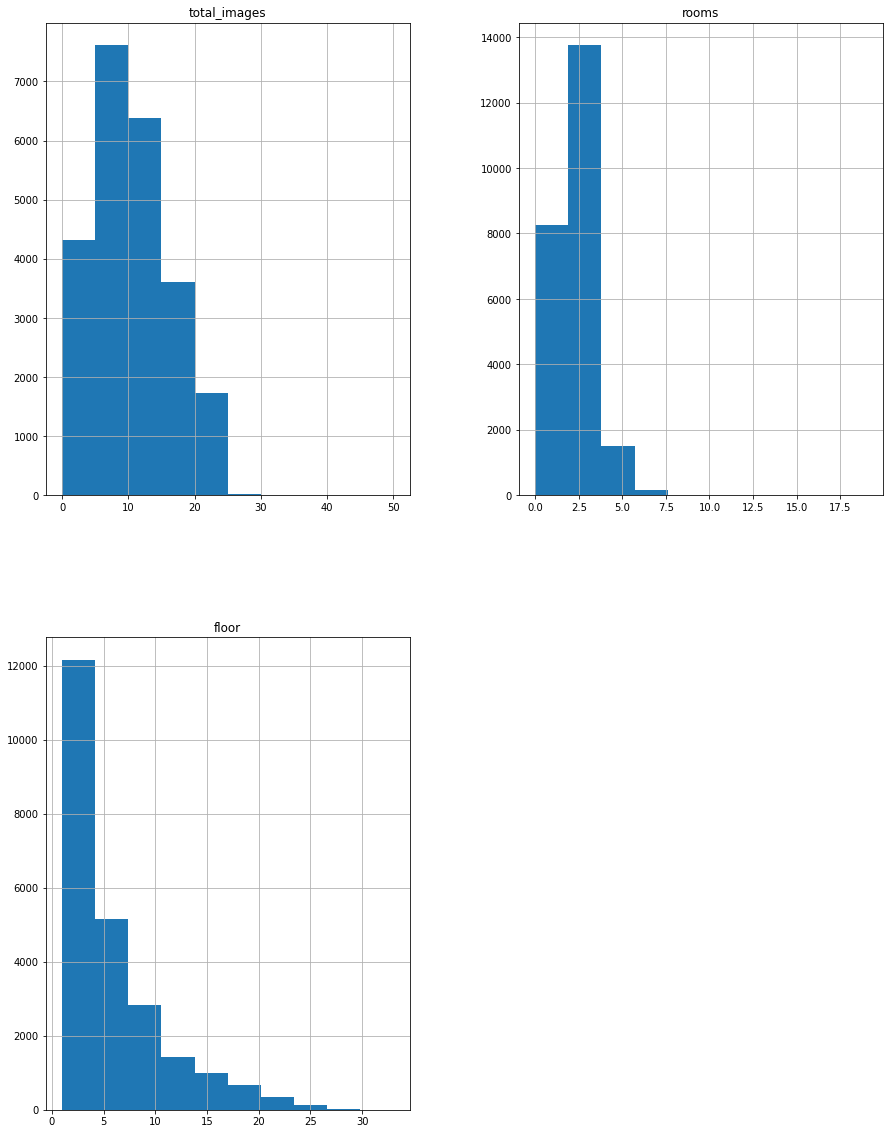

In [4]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t', decimal=',')
data.info()
display (data.head(10))
data.hist(figsize=(15, 20))

### Предобработка данных

In [7]:
for i in data:
    print (i,data[i].isna().sum()) #смотрим количество нулевых значений в столбцах
# заменим нулевые значение в столбце с высотой потолков на медианные значения, так как параметр не играет весомой роли при анализе данных и разброс значений в =- 0,5 метра не является существенным.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

#Проанализируем столбец с длительностью продаж
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
display(data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count'))



#пропуски значений в столбце "является апартаментом" логично заменить на "0", так как обычно укзывают этот параметр только, если квартира является апартаментом. Получим '0 ' - не является апартаментом, '1' - является
#то же касается и столбца с наличием балконов,если данных нет, то и балконов скорее всего нет. Заменяем на "0". 
#аналогично, если не указано количество водоемов и парков поблизости,то скорее всего их нет. Земеним значения на "0
list_0 = {'is_apartment','balcony','parks_around3000','ponds_around3000'}
for i in list_0:
    data[i] = data[i].fillna('0')

# На каком этаже находится квартира важно, как и сколько этажей всего в доме, но если этих показателей нет, взять значение неоткуда, оставляем как есть. 
# Можем допустить, что площадь кухни и жилая площадь в среднем зависит от количетва комнат в квартире, тогда заменим пропуски в данном столбце на медианные значения (допущение очень грубое, возможно лучше было бы оставить пустые значения):

for el in data['rooms'].unique():
    data.loc[( data['rooms'] == el) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[( data['rooms'] == el),'living_area'].median()
    #data.loc[( data['rooms'] == el) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    #data.loc[( data['rooms'] == el),'kitchen_area'].median()
#Расстояния и название мест нам взять не откуда, оставим пропуски как есть.



total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 0
floors_total 86
living_area 0
floor 0
is_apartment 0
studio 0
open_plan 0
kitchen_area 2278
balcony 0
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 0
parks_nearest 15620
ponds_around3000 0
ponds_nearest 14589
days_exposition 3181
first_day_year 0


first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


К пропускам в данных могло привести отсутствие сведений о недвижимости от продавца,отсутствие техпаспорта на квартиру, "человеческий" фактор при внесении данных,  не желание ответственного за данные лица выяснять расстояния по карте) 

In [39]:
# В столбцах  "last_price",    "floors_total" ,   "balcony", "parks_around3000",  "ponds_around3000", "airports_nearest"  
# "cityCenters_nearest", "parks_nearest", "ponds_nearest" находятся целочисленные значения.
#Преобразуем в них тип данных в int 

list1 = {'last_price','floors_total','balcony','parks_around3000','ponds_around3000','days_exposition'}
for i in list1:
    data[i] = data[i].astype('float64').astype('int',errors='ignore')

# В столюцах    "total_area" ,"ceiling_height" ,"living_area", "kitchen_area" надо преобразовать тип данных в числовой с плавающей точкой

list2 = {'total_area','ceiling_height','living_area','kitchen_area','airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest'}
for el in list2:
    data[el] = pd.to_numeric(data[el],errors='ignore') 

#first_day_exposition  - дата. Сделаем её красивой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# осталось изменить тип в столбце " is_apartment" на bool, так как либо квартира на самом деле апартаменты, либо нет
data['is_apartment'] = data['is_apartment'].astype('bool') 
# Посмотрим на то, что получилось. Выведем основные сведения о таблице и первые её 10 строк
data.info()
print (data.head(10))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21303 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21303 non-null  int64         
 1   last_price            21303 non-null  int64         
 2   total_area            21303 non-null  float64       
 3   first_day_exposition  21303 non-null  datetime64[ns]
 4   rooms                 21303 non-null  int64         
 5   ceiling_height        21303 non-null  float64       
 6   floors_total          21264 non-null  float64       
 7   living_area           21303 non-null  float64       
 8   floor                 21303 non-null  int64         
 9   is_apartment          21303 non-null  bool          
 10  studio                21303 non-null  bool          
 11  open_plan             21303 non-null  bool          
 12  kitchen_area          21303 non-null  float64       
 13  balcony         

Изменять тип данных необходимо для того, чтобы в дальнейшем при анализе можно было совершать над данными различные математические и логические операции, которые "не работают" для строк.

In [10]:
data['locality_name'] = data['locality_name'].str.lower() 
print(data['locality_name'].value_counts())
print(data['locality_name'].unique())
#Создаю функцию для переименования дублей
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values: 
        data['locality_name'] = data['locality_name'].replace(wrong_value, correct_value) 

duplicates = ['поселок мурино', 'мурино'] 
name = 'посёлок мурино'
replace_wrong_values(duplicates, name)
duplicates = ['поселок бугры']
name = 'посёлок бугры'
replace_wrong_values(duplicates, name)
duplicates = ['поселок возрождение']
name = 'посёлок возрождение'
replace_wrong_values(duplicates, name)
duplicates = ['посёлок городского типа павлово', 'село павлово','городской посёлок павлово']
name = 'павлово'
replace_wrong_values(duplicates, name)
duplicates = ['поселок новый свет']
name = 'посёлок новый свет'
replace_wrong_values(duplicates, name)
duplicates = ['деревня кудрово' ]
name = 'кудрово'
replace_wrong_values(duplicates, name)
duplicates = [ 'городской посёлок фёдоровское','деревня фёдоровское' ]
name = 'фёдоровское'
replace_wrong_values(duplicates, name)
duplicates = ['поселок победа', ]
name = 'посёлок победа'
replace_wrong_values(duplicates, name)
duplicates = ['городской поселок янино-1', ]
name = 'городской посёлок янино-1'
replace_wrong_values(duplicates, name)
duplicates = [ 'поселок городского типа красный бор', ]
name = 'посёлок городского типа красный бор'
replace_wrong_values(duplicates, name)
duplicates = [ 'городской посёлок советский' ]
name = ' поселок городского типа советский'
replace_wrong_values(duplicates, name)
duplicates = ['поселок кингисеппский', ]
name = 'кингисепп'
replace_wrong_values(duplicates, name)
duplicates = ['городской посёлок рощино', ]
name = 'посёлок городского типа рощино'
replace_wrong_values(duplicates, name)
duplicates = [  'поселок кобралово' ]
name = 'посёлок кобралово'
replace_wrong_values(duplicates, name)
duplicates = ['поселок городского типа токсово', ]
name = 'посёлок городского типа токсово'
replace_wrong_values(duplicates, name)
duplicates = ['поселок перово', ]
name = 'посёлок перово'
replace_wrong_values(duplicates, name)
duplicates = ['поселок коробицыно', ]
name = 'посёлок коробицыно'
replace_wrong_values(duplicates, name)
duplicates = ['поселок пансионат зелёный бор', ]
name = 'посёлок пансионат зелёный бор'
replace_wrong_values(duplicates, name)
duplicates = [ 'городской поселок большая ижора'  ]
name = 'поселок городского типа большая ижора'
replace_wrong_values(duplicates, name)
duplicates = ['поселок рябово'] 
name = 'поселок городского типа рябово'
replace_wrong_values(duplicates, name)
duplicates = ['поселок тельмана'] 
name = 'посёлок тельмана'
replace_wrong_values(duplicates, name)

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
                     ...  
деревня лупполово        1
деревня каськово         1
деревня котлы            1
деревня кривко           1
деревня ялгино           1
Name: locality_name, Length: 364, dtype: int64
['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'посёлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'посе

In [11]:
# Посмотрим какие уникальные значения есть в столбцах и в каком количестве
columns = list(data)
for i in columns:
    print(i,data[i].value_counts())
    print(i,data[i].unique())
# Видно, что есть неправдоподобные данные в столбце с количеством комнат. Больше 6и комнат ЦИАН не предлагает) Поэтому значения больше 6 будем считать неправдоподобными и заменим на 0
# Также удалим значения общего количества этажей, если их в доме больше 36. Если верить Яндексу, таких в Санкт-Петербурге нет)

data.loc[data['rooms'] > 6, 'rooms'] = 0
data.loc[data['floors_total'] > 36, 'floors_total'] = 0 
# Если высота потолков больше 10 метров, то скорее всего в данных не там поставили ",".  Если же высота потолков меньше 2 метров или больше 4, то такие данные кажутся неправдоподобными, заменим их медианным значением
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4), 'ceiling_height'] = data['ceiling_height'].median()
# Аномально маленькие жилые площади удалим:
data = data[data['living_area']> 10]

#Посмотрим, сколько есть квартир с огромными кухнями
#print ('Квартиры с очень большими кухнями',len(data.loc[data['kitchen_area'] > 50]))
#Удалим нереально большие кухни и очень маленькие)
data = data[(data['kitchen_area']< 50)&(data['kitchen_area']> 3)]
# Удaлим значения из столбца с последней ценой подозрительно дешевые квартиры, стоимостью меньше 1 млн. руб. Очень дорогие удалять не будем, потолка цен нет.
data.loc[data['last_price'] >1000000]
display (data)

 

total_images 10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price 4500000     342
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
1320000       1
19150000      1
6649000       1
10296437      1
11615600      1
Name: last_price, Length: 2978, dtype: int64
last_price [13000000  3350000  5196000 ...  6151120 21400000 11475000]
total_area 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,True,...,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,True,...,0,городской посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,True,...,0,петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0,2016
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,True,...,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,30.5,12,True,...,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,2017


В данных были выявлены следующие аномалии:
 - количество этажей в доме больше 36
 - высота потолков меньше 2 метров и больше 4
 - количество комнат в квартире больше 6
 Немного смущает слишком большое количество фотографий (больше 15 штук), но с другой стороны, кто мешает показать всё?)
 Площадь кухни больше 50 кв. м  вызывает большие сомнения.  46 значений огромных кухонь, думаю, можно не учитывать при анализе. Стоимость квартиры ниже 1 млн руб крайне нереалистична.
 Не могу понять, почему тип данных в столбце "parks_nearest" вдруг преобразовался в int вместо float

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
#Цена одного нвадратного метра (округлим до целых рублей):
data['metr_price'] = round( data['last_price']/ data['total_area'] )
# Добавляем столбец с днём недели выпуска объявления:
data['day_exp'] = data['first_day_exposition'].dt.dayofweek
# Добавляем столбец с месяцем выпуска объявления:
data['month_exp'] = data['first_day_exposition'].dt.month
#Добавляем столбец с годом выпуска объявления:
data['year_exp'] = data['first_day_exposition'].dt.year
# Определим тип этажа квартиры:
for i in data['floors_total']:
    def floor_t (floor):
        if floor == 1 :
            return 'первый'
        if floor == i  :
            return 'последний'
        return 'другой'
data['floor_type'] = data['floor'].apply(floor_t)
# Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['to_centr'] = round( data['cityCenters_nearest']/1000)
display (data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,metr_price,day_exp,month_exp,year_exp,floor_type,to_centr
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,2,755.0,NaN,2019,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,0,NaN,81.0,2018,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,2,574.0,558.0,2015,92786.0,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,1,48.0,121.0,2018,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,0,NaN,55.0,2018,95066.0,0,9,2018,последний,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,0,NaN,155.0,2017,99196.0,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,True,...,0,NaN,NaN,2019,110545.0,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,0,NaN,189.0,2018,87455.0,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0,NaN,289.0,2017,88525.0,6,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,True,...,2,553.0,137.0,2017,127525.0,3,11,2017,другой,14.0


### Проведите исследовательский анализ данных

count    21303.000000
mean        60.342447
std         32.865089
min         20.000000
25%         40.600000
50%         52.400000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

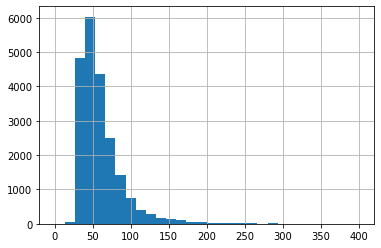

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

data['total_area'].hist(bins =30, range=(0,400))
data['total_area'].describe()



Половина квартир на рынке с общей площадью 52 кв.метров, так же много предложений квартир площадью от 50 до 80 кв.м. Квартир свыше 100 кв.м. существенно меньше, а тех, чья площадь больше 200 кв.м - единицы. Минимальная площадь квартиры - 14 кв.м., максимальная - 631.2 кв.м.

count    7329.000000
mean      488.329786
std       338.260252
min         1.000000
25%       288.000000
50%       453.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

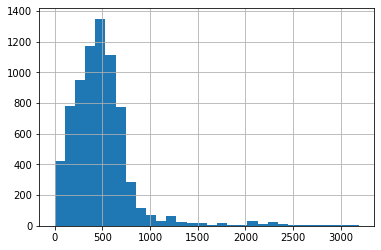

In [14]:
data['parks_nearest'].hist(bins =30)
data['parks_nearest'].describe()

Большинство людей, видимо, предпочитают жить радом с парком. Больше всего предложений с парком в радиусе 500 метров. Немного предложений от 1500 до 3000 м. Если парк находится дальше 3 км смысла его указывать особо нет - далеко. Минимальное расстояние до парка 1 м вызывает явные сомнения, но кто как считает, может парк через дорогу.

count    21303.000000
mean         2.551566
std          1.783476
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exp, dtype: float64

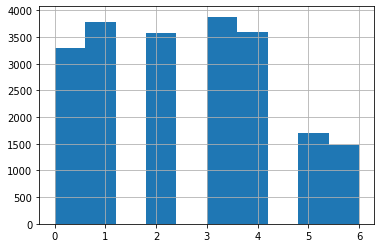

In [15]:
data['day_exp'].hist(bins = 10)
data['day_exp'].describe()

Меньше всего объявлений публикуют в выходные, больше всего во вторник и четверг, чуть меньше в среду и пятницу.

count    16514.000000
mean     14236.133765
std       8645.838848
min        181.000000
25%       9350.000000
50%      13105.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

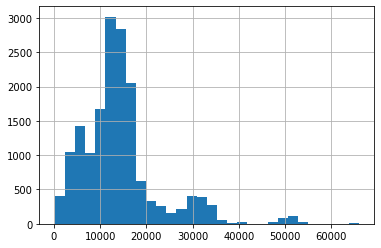

In [16]:
data['cityCenters_nearest'].hist(bins = 30)
data['cityCenters_nearest'].describe()

Большинство квартир находится в радиусе от 10 до 20 км от центра города. Среднее значение расстояния от центра - чуть более 14км. Инфраструктура людям важна) В самом центре предложений не так уж и много. Сильно далеко (больше 45 км) квартир в продаже мало. А те, что находятся дальше, чем 60 км можно в расчёт не брать вовсе - их ничтожно мало.

count    21303.000000
mean         5.856217
std          4.833490
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

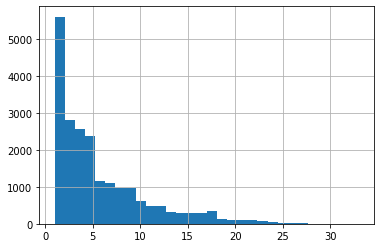

In [17]:
data['floor'].hist(bins = 30)
data['floor'].describe()

Большинство квартир находится на первых трёх этажах зданий.  Есть существенная доля квартир с 5 по 10 этаж. На более высоких этажах количесвто предложений снижается. Чем выше хочешь этаж, тем сложнее найти подходящую квартиру. В высотках более 25 этажей - единичные предложения. Самый высокий этаж, на котором можног поселиться - 33.

count    21303.000000
mean         2.693335
std          0.206577
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

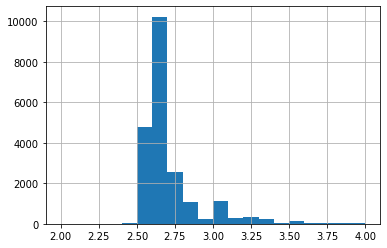

In [18]:
data['ceiling_height'].hist(bins = 20)
data['ceiling_height'].describe()

Высота потолков в среднем составляет 2,7 метра. Квартир с высокми потолками более 3,5 метра очень мало. Но есть из чего выбрать квартиры с высотой потолков от 3 до 3,35 метров. Самые высокие потолки достигают 4 метров.

count    21264.000000
mean        10.579477
std          6.514310
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         36.000000
Name: floors_total, dtype: float64

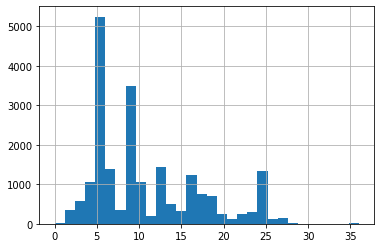

In [19]:
data['floors_total'].hist(bins = 30)
data['floors_total'].describe()

Самое большое количество квартир продаётся в пятиэтажках. Ещё довольно много предложений в десятиэтажных домах. Дома в 17,25 этажей тоже представлены на рынке. А очень высоких домов этажностью свыше 30 этажей практически нет. Самый высокий дом - в 36 этажей.

count    21303.000000
mean         2.065578
std          0.992588
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

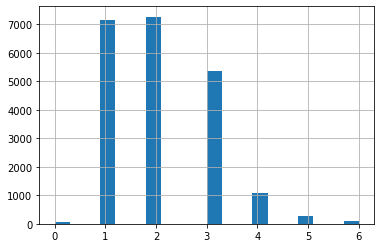

In [20]:
data['rooms'].hist(bins = 20)
data['rooms'].describe()

Больше всего на рынке одно- и двух-комнаттных квартир.Их доля составляет больше половины рынка недвижимости. Трёхкомнатных значительно больше, чем четырёх. А квартир свыше 5 комнат очень мало.

count     21303.000000
mean       6393.801077
std        8565.483727
min          12.190000
25%        3500.000000
50%        4700.000000
75%        6800.000000
max      401300.000000
Name: last_price, dtype: float64

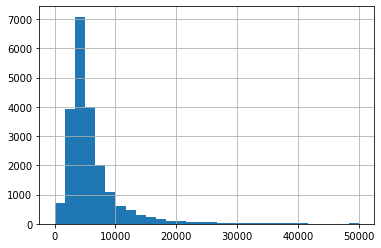

In [21]:
data['last_price'] = round((data['last_price']/1000),2)
data['last_price'].hist(bins = 30, range = (0,50000))

data['last_price'].describe()

Средняя стоимость квартир составляет 6,4 млн рублей. Минимальная цена - 1219000 тысяч рублей
Очень много квартир на рынке стоимостью от 3 до 5 млн рублей.Немного предложений дешевых квартир до 2 млн и примерно столько же очень дорогих, стоимостью свыше 8 млн рублей.

count    21303.000000
mean        34.463079
std         20.888138
min         10.080000
25%         18.800000
50%         30.300000
75%         42.600000
max        347.500000
Name: living_area, dtype: float64

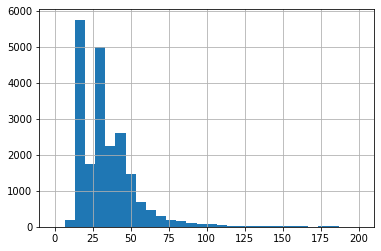

In [22]:
data['living_area'].hist(bins = 30, range = (0,200))
data['living_area'].describe()

Квартир с площадью более 110 кв.м.крайне мало. Преобладают на рынке маленькие квартиры (видимо, студии ) с площадью от 15 до 20 кв.м. Так же много наверное однушек с площадью около 30 кв.м. БОльшая часть квартир с площадью до 50 кв.м. От 50 кв.м. до 100 кв.м. - резкий спад. Чем площадь больше, тем меньше предложений.

count    21303.000000
mean        10.422957
std          5.170081
min          3.200000
25%          7.000000
50%          9.100000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

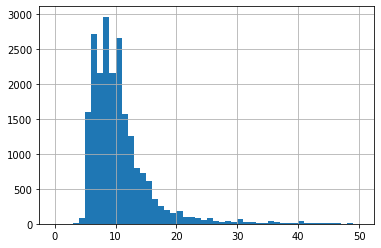

In [23]:
data['kitchen_area'].hist(bins = 50, range = (0,50))
data['kitchen_area'].describe()

Площадь кухни от 5 до 12 метров - самая популярная. Кухни менее 5 кв.м. встречаются очень редко, как и те, чья площадь больше 25 кв.м. Квартир с большими кухнями от 16 до 25 кв.м. совсем немного.

count    16493.000000
mean     28805.628509
std      12643.826494
min          0.000000
25%      18551.000000
50%      26757.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

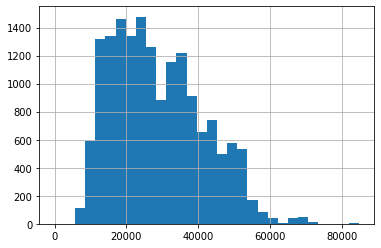

In [24]:
data['airports_nearest'].hist(bins = 30)
data['airports_nearest'].describe()

Большинство предлоджений в радиусе 10 - 40 км от аэропорта. Среднее расстояние до аэропорта - почти 29 км. Меньше, но есть из чего выбрать, на расстоянии от 40 до 70 км. А вот дальше 70 км то аэропорта предложений практичеки нет.

count    21303.000000
mean         6.420504
std          3.466060
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64

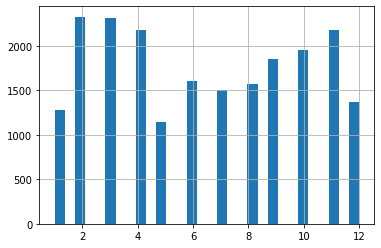

In [25]:
data['month_exp'].hist(bins = 30)
data['month_exp'].describe()

Самые "активные" месяца начала продаж - это февраль, март и декабрь. Меньше вего объявлений появляется в январе, мае (видимо из-за большого количества нерабочих дней). Примерно одинакова активность летом и в декабре.

Спасибо!

Медианное значение длительности продаж:  102.0
Среднее значение длительности продаж:  185.49329407916258


count    18342.000000
mean       185.493294
std        222.396925
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

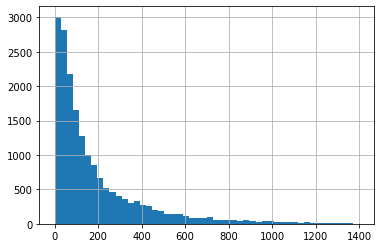

In [27]:
print('Медианное значение длительности продаж: ',data['days_exposition'].median())
print('Среднее значение длительности продаж: ',data['days_exposition'].mean())
data['days_exposition'].hist(bins = 50, range = (0,1400))
data['days_exposition'].describe()

В среднем, для того чтобы продать квартиру в Санкт-Петербурге и пригородах требуется полгода. Большое количество квартир продаётся быстрее - за пару месяцев.  Продажи за месяц можно ститать быстрыми и таких немало. Значительно реже случаются очень долгие продажи. Квартиры, которые продаются дольше двух лет  - долгие продажи. Хорошо, что такие долгие сделки случаются крайне  редко.

<AxesSubplot:title={'center':'Зависимоть цены от общей площади'}, xlabel='total_area'>

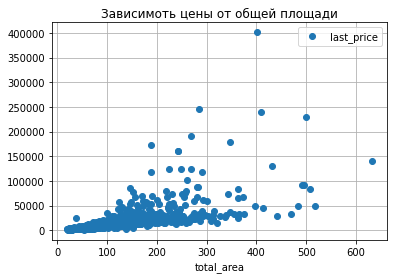

In [28]:
tot_area = data.pivot_table(index ='total_area',values ='last_price')
tot_area.plot(title ='Зависимоть цены от общей площади',style='o', grid=True) 

Разброс цен на квартиры с общей площадью до 100 кв.м. невелик. Если поискать, то можно найти квартиры с общей площадью от 50 до 10 кв.м. примерно по одной цене.Так как предложений небольших квартир много, есть из чего выбрать. В диапозоне до 5,5 млн.р. масса предложений. Цены растут с увеличеникм площади, на квартирах больше 100 кв. м. разброс цен нагляднее. При этом большие квартиры примерно одной общей площади могут отличаться по цене в несколько раз. Есть как подозрительно дешевые большие квартиры, так и очень дорогие. Квартир с общей площадью больше 600 кв.м. всего 3. Возможно, нужно исключить их из расчёта. Но вдруг кто-то продаёт этажи больших домов как квартиры?)

<AxesSubplot:title={'center':'Зависимоть цены от жилой площади'}, xlabel='living_area'>

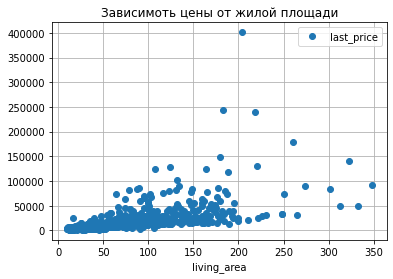

In [29]:
liv_area = data.pivot_table(index ='living_area',values ='last_price')
liv_area.plot(title='Зависимоть цены от жилой площади',style='o', grid=True)


Есть несколько аномально дорогих квартир жилой площадью около 200 кв.м. по сравнению со средней ценой на рынке, также выделяется подозрительно дешевая квартира с жилой площадью более 400 кв.м. Вообще квартир с большой жилой площадь. (более 200 кв.м) на рынке немного и на них сильно разнятся цены. На квартиры с меньшей жилой площадью и уены меньше. Прямая зависимость цены от площади прослеживается, но для любых площадей есть квартиры с высокой ценой, чего не скажешь о нижней границе стоимости.

<AxesSubplot:title={'center':'Зависимоть цены от площади кухни'}, xlabel='kitchen_area'>

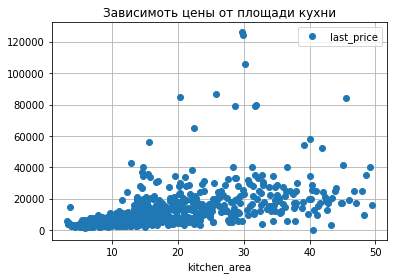

In [30]:
kit_area = data.pivot_table(index ='kitchen_area',values ='last_price')
kit_area.plot(title='Зависимоть цены от площади кухни',style='o', grid=True) 

Цены на квартиры с кухнями до 15 кв.м. находятся примерно в одном диапозоне. Нельзя сказать, что размер кухни прямо влияет на стоимость. Но выделяется несколько предложений с большими кухнями от 25 до 45 кв.м. по очень высокой цене.

<AxesSubplot:title={'center':'Зависимоть цены от количества комнат'}, xlabel='rooms'>

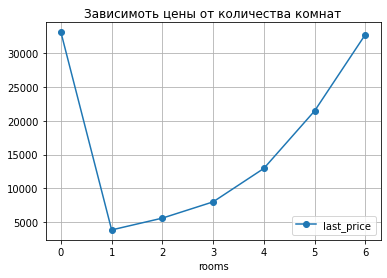

In [31]:
room = data.pivot_table(index ='rooms',values ='last_price')
room.plot(title='Зависимоть цены от количества комнат',style='o-', grid=True) 

На графике явно видно, что чем больше комнат в квартире, тем она дороже. Учитывая, что под "0" комнат у нас находтся недостоверные данные со слишком   большим изначальным количеством комнат,делать выводы о их стоимости не совсем корректно.

<AxesSubplot:title={'center':'Зависимоть цены от типа этажа'}, xlabel='floor_type'>

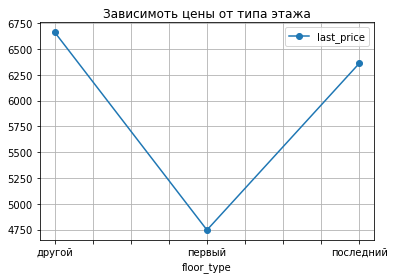

In [32]:
fl_type = data.pivot_table(index ='floor_type',values ='last_price')
fl_type.plot(title='Зависимоть цены от типа этажа',style='o-', grid=True) 

Видимо, квартиры, находящиеся на первом этаже сильно уступают в цене всем другим. Квартиры на последнем этаже тоже чуть дешевле тех, что находятся ниже, но разница эта не столь существенна, как с первым.

<AxesSubplot:title={'center':'Зависимоть цены от дня продажи'}, xlabel='day_exp'>

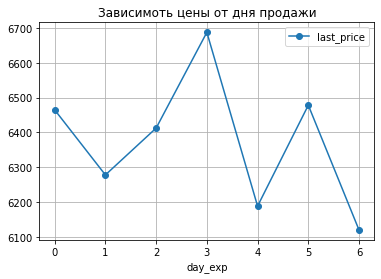

In [33]:
day = data.pivot_table(index ='day_exp',values ='last_price')
day.plot(title='Зависимоть цены от дня продажи',style='o-', grid=True) 

Самые дорогие сделки проходят по четвергам, а самые дешевые - по пятницам и  воскресеньям.

<AxesSubplot:title={'center':'Зависимоть цены от месяца продажи'}, xlabel='month_exp'>

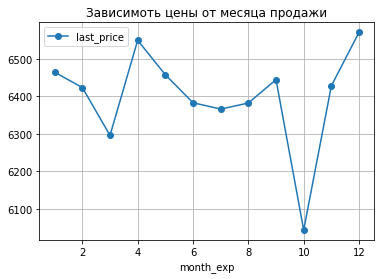

In [34]:
month = data.pivot_table(index ='month_exp',values ='last_price')
month.plot(title='Зависимоть цены от месяца продажи',style='o-', grid=True) 

Меньше всего квартир продаётся в октябре,есть спад также в марте. Больше всего в апреле и декабре. В остально время года рынок более-менее стабилен.

<AxesSubplot:title={'center':'Зависимоть цены от года продажи'}, xlabel='year_exp'>

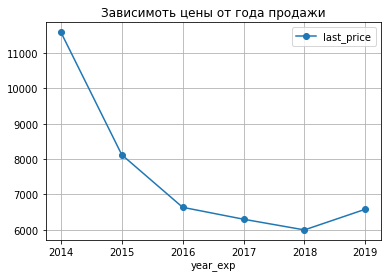

In [35]:
year = data.pivot_table(index ='year_exp',values ='last_price')
year.plot(title='Зависимоть цены от года продажи',style='o-', grid=True) 

Очень странно, но цены после кризиса 2014 года пошли на спад, вплоть до кризиса 2018. Затем начался плавный рост цен.

In [36]:
id_max = data.pivot_table( index='locality_name',values = 'metr_price',aggfunc=['count', 'mean']).reset_index()
#Не пойму как с 0 пронумеровать индексы. на 'drop = True' - ругается:(
id_max.columns = [ 'locality_name','count', 'mean_price']
#Округлим среднюю стоимость жилья за метр до целых рублей
id_max['mean_price'] = round(id_max['mean_price'])
top_cities = id_max.sort_values(by = 'count', ascending=False).head(10)
display ('Населенные пункты с наибольшим числом объявлений:',top_cities)

display('Населенный пункт с самой высокой стоимотью квадратного метра: ',top_cities.loc[305,'locality_name'], 'Средняя цена за квадратный метр:',top_cities['mean_price'].max())
display('Населенный пункт с самой низкой стоимотью квадратного метра: ', top_cities.loc[5,'locality_name'], 'Средняя цена за квадратный метр:',top_cities['mean_price'].min())


'Населенные пункты с наибольшим числом объявлений:'

,locality_name,count,mean_price
305,санкт-петербург,14247,113512.0
258,посёлок мурино,474,85379.0
295,посёлок шушары,397,78582.0
123,кудрово,388,95320.0
4,всеволожск,357,69029.0
299,пушкин,331,102982.0
117,колпино,322,75226.0
7,гатчина,294,68693.0
263,посёлок парголово,289,90691.0
5,выборг,200,58311.0


'Населенный пункт с самой высокой стоимотью квадратного метра: '

'санкт-петербург'

'Средняя цена за квадратный метр:'

113512.0

'Населенный пункт с самой низкой стоимотью квадратного метра: '

'выборг'

'Средняя цена за квадратный метр:'

58311.0

Самое большое количество объявление в г. Санк-Петербурге, там же и самая высока цена за квадтраный метр - 113517 руб. Самая изкая стоимость квадратного метра из ТОП-10 популярных мест в Выборге, почти в 2 раза дешевле, чем в Санкт-Петербурге - 58311 руб.

'Средняя цена каждого километра:'

,to_centr,metr_price
0,0.0,241173.173913
1,1.0,168437.286550
2,2.0,159856.877256
3,3.0,119994.850000
4,4.0,128970.895161
5,5.0,136337.840633
6,6.0,145449.710526
7,7.0,153967.575269
8,8.0,125052.512868
9,9.0,112534.100372


<AxesSubplot:title={'center':'Зависимоть цены от удаленности от центра'}>

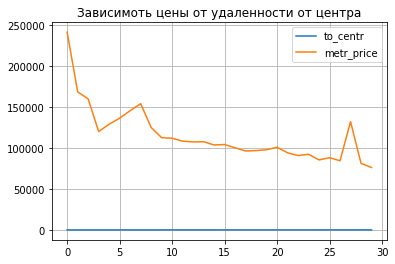

In [37]:
flat_spb = data.query('locality_name == "санкт-петербург"')
#display (flat_spb)
flat_spb_mean_price = flat_spb.pivot_table(index = 'to_centr',values ='metr_price',aggfunc='mean').reset_index()
display('Средняя цена каждого километра:',flat_spb_mean_price)

flat_spb_mean_price.plot(title='Зависимоть цены от удаленности от центра',style='-', grid=True) 


Самый дорогой квадратный метр в центре города.Довольно резко ддешевеет в радиусе 3х км, потом цена за метр становится выше в райне 6-7 км от центра. В радиусе 10-23 км от  цена хоть и снижается дальше от центра, но не значительно. Резкий скачок цен наблюдается на расстоянии  27 км от центра Санкт-Петербурга, скорее всего в курортном пригороде) Цена квадратного метра в 30 км от центра и в самом центре разниться более, чем в 2 раза.

<AxesSubplot:title={'center':'Зависимоть цены от удаленности от центра'}>

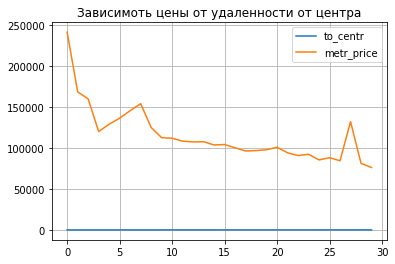

In [38]:
flat_spb_mean_price.plot(title='Зависимоть цены от удаленности от центра',style='-', grid=True) 

### Общий вывод

В ходе работы надо проектом была проведена первичная обработка данных: удалены/заменены некорректные и пустые значения, устранены дубликаты в названиях.
Исследования полученных данных показали, что на рынке недвижимости города Санкт-Петербурга преобладают квартиры небольшой площадью (до 50 кв.м.) - студии/одно - двух комнатные квартиры.Есть и элитные квартиры в продаже с общей площадью более 400 кв.м., но таких предложений немного.Интересно, что цены на такие большие квартиры очень сильно разнятся.Стоимость жилья напрямую зависит от его площади и количества комнат. Средняя стоимость  жилья до 50кв. м. около 4 млн рублей, но цена разница от расположения (ближе к центру дороже) и довольно сильно отличается в зависимости от того, на каком этаже располагается. 
Можно сделать вывод, что самые дешевые квартиры можно купить в Выборге, скорее всего на первом этаже пятиэтажного дома, с небольшой площадью около 30 кв.м., средней кухней м в 7 и потолками в 2,6 метра. Самый дорогой квадратный метр  - в центре Санкт-Петербурга. 
При выборе квартиры люди обращают внимание на её расположение относительно парков, много предложений в радиусе 500 м до зелёной зоны. Инфраструктура также имеет большое значение, поэтому бБольшая часть предложений в радиусе 40 км от центра и от аэропорта.
Максимальное количество объявлений появляется по четвергам, в декабре и апреле.В октябре наблюдается резкий спад рынка.
"Первый, последний не предлагать, рядом с метро, центр" -актуально в Питере по сей день:)